##### **Project Type**    -   Machine Learning framework

#### Project:Real Estate Investment Advisor: Predicting Property Profitability & Future Value

Develop a machine learning application to assist potential investors in making real estate decisions

##### Key Steps:
1. Data Preprocessing
2. Exploratory Data Analysis (EDA)
3. Model Development
4. MLflow Integration
5. Streamlit App

The project successfully classify whether a property is a good investment (classification) and Predict the estimated property price after 5 years (Regression).


# **GitHub Link -**

https://github.com/Raghuram94-msd/Real-estate-investment-advisor

# **Problem Statement**

Develop a machine learning application to assist potential investors in making real estate decisions. The system should:
    
1.	Classify whether a property is a "Good Investment" (Classification)
2.	Predict the estimated property price after 5 years (Regression)

Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts

## ***1. Data Preprocessing***

### Import Libraries

In [2]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv(r'E:\ML internship\Real estate investment advisor\india_housing_prices.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(250000, 23)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

### What did you know about your dataset?

The dataset contains 250000, rows and 23 columns, with no duplicate entries. The dataset also does not have missing values.

## ***Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

ID                                250000
State                                 20
City                                  42
Locality                             500
Property_Type                          3
BHK                                    5
Size_in_SqFt                        4501
Price_in_Lakhs                     48700
Price_per_SqFt                       100
Year_Built                            34
Furnished_Status                       3
Floor_No                              31
Total_Floors                          30
Age_of_Property                       34
Nearby_Schools                        10
Nearby_Hospitals                      10
Public_Transport_Accessibility         3
Parking_Space                          2
Security                               2
Amenities                            325
Facing                                 4
Owner_Type                             3
Availability_Status                    2
dtype: int64

## Pre processing

In [6]:
# Checking for outliers

import pandas as pd
import numpy as np

# Select numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        outlier_summary[col] = {
            "num_outliers": outliers.count(),
            "percent_outliers": (outliers.count() / len(data)) * 100,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary).T

# Run detection
iqr_outliers = detect_outliers_iqr(df)
print(iqr_outliers)


                  num_outliers  percent_outliers  lower_bound  upper_bound
ID                         0.0             0.000  -124998.500   374999.500
BHK                        0.0             0.000       -1.000        7.000
Size_in_SqFt               0.0             0.000    -1753.500     7250.500
Price_in_Lakhs             0.0             0.000     -233.945      743.375
Price_per_SqFt         20020.0             8.008       -0.115        0.325
Year_Built                 0.0             0.000     1972.500     2040.500
Floor_No                   0.0             0.000      -17.000       47.000
Total_Floors               0.0             0.000      -14.500       45.500
Age_of_Property            0.0             0.000      -15.500       52.500
Nearby_Schools             0.0             0.000       -4.500       15.500
Nearby_Hospitals           0.0             0.000       -4.500       15.500


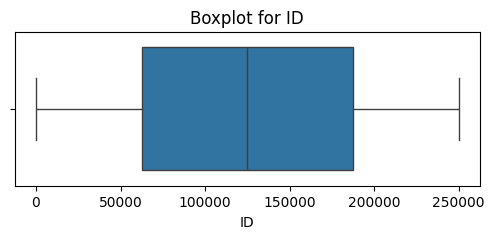

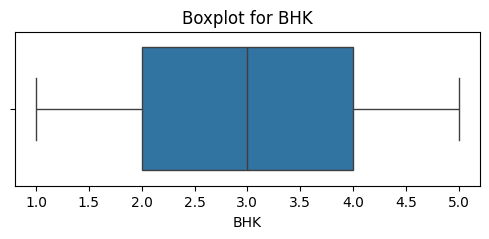

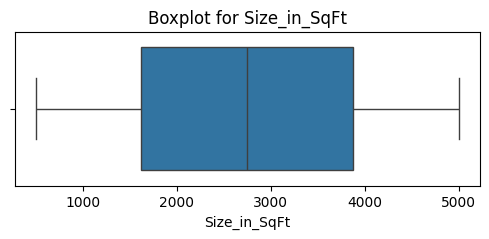

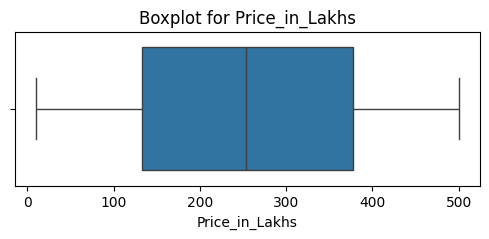

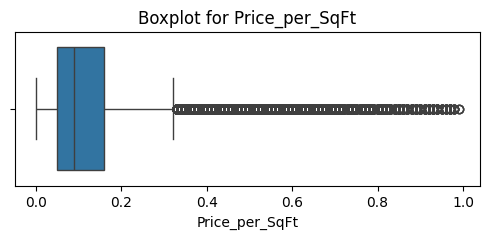

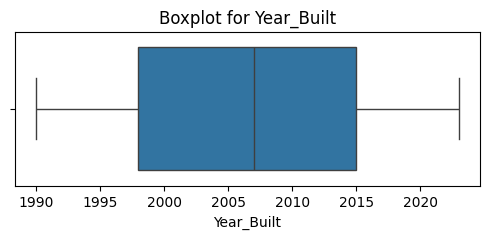

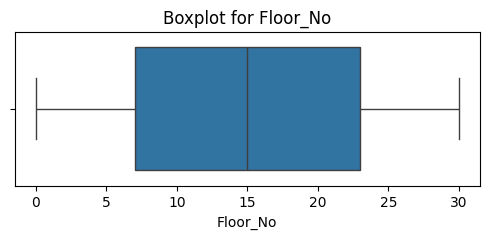

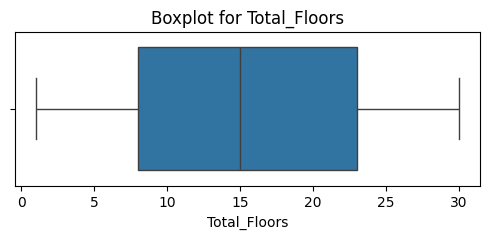

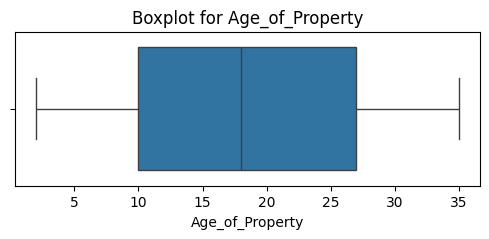

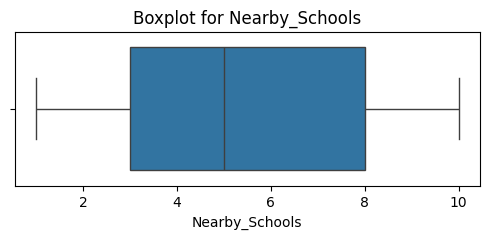

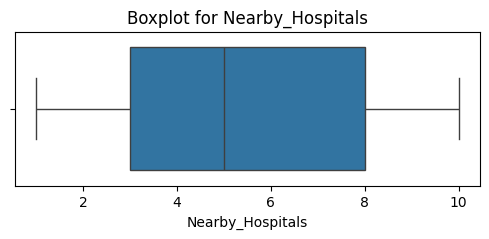

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

#### Sacling features and label encoding

In [5]:

import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv(r'E:\ML internship\Real estate investment advisor\india_housing_prices.csv')

# -----------------------------
# 2. Identify feature types
# -----------------------------

# Numerical columns (update if needed)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Categorical columns
categorical_cols = ["State","City", "Property_Type"]

# Remove categorical columns from numeric list if present
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]

# -----------------------------
# 3. Robust Scaling for numerical features
# -----------------------------
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# -----------------------------
# 4. One-Hot Encoding for categorical features
# -----------------------------
ohe = OneHotEncoder(drop="first", sparse_output=False)

encoded_array = ohe.fit_transform(df_scaled[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)

df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols)

# -----------------------------
# 5. Combine scaled + encoded features
# -----------------------------
df_final = pd.concat([df_scaled.drop(columns=categorical_cols), df_encoded], axis=1)

# -----------------------------
# 6. Final Output
# -----------------------------
print("Scaled numerical columns:")
print(numeric_cols)

print("\nEncoded categorical feature columns:")
print(encoded_cols)

print("\nFinal dataframe shape:", df_final.shape)
df_final.head()


Scaled numerical columns:
['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']

Encoded categorical feature columns:
['State_Assam' 'State_Bihar' 'State_Chhattisgarh' 'State_Delhi'
 'State_Gujarat' 'State_Haryana' 'State_Jharkhand' 'State_Karnataka'
 'State_Kerala' 'State_Madhya Pradesh' 'State_Maharashtra' 'State_Odisha'
 'State_Punjab' 'State_Rajasthan' 'State_Tamil Nadu' 'State_Telangana'
 'State_Uttar Pradesh' 'State_Uttarakhand' 'State_West Bengal'
 'City_Amritsar' 'City_Bangalore' 'City_Bhopal' 'City_Bhubaneswar'
 'City_Bilaspur' 'City_Chennai' 'City_Coimbatore' 'City_Cuttack'
 'City_Dehradun' 'City_Durgapur' 'City_Dwarka' 'City_Faridabad'
 'City_Gaya' 'City_Gurgaon' 'City_Guwahati' 'City_Haridwar'
 'City_Hyderabad' 'City_Indore' 'City_Jaipur' 'City_Jamshedpur'
 'City_Jodhpur' 'City_Kochi' 'City_Kolkata' 'City_Lucknow' 'City_Ludhiana'
 'City_Mangalore' 'City_Mumbai' 'Ci

,ID,Locality,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,...,City_Raipur,City_Ranchi,City_Silchar,City_Surat,City_Trivandrum,City_Vijayawada,City_Vishakhapatnam,City_Warangal,Property_Type_Independent House,Property_Type_Villa
0,-1.000000,Locality_84,-1.0,0.885384,0.965457,0.090909,-1.000000,Furnished,0.4375,-0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.999992,Locality_490,0.0,-0.170147,-0.238816,-0.090909,0.058824,Unfurnished,0.3750,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.999984,Locality_167,-0.5,0.397601,-0.286825,-0.363636,-0.588235,Semi-furnished,0.2500,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.999976,Locality_393,-0.5,-0.002665,0.189989,0.181818,-0.941176,Furnished,0.3750,0.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.999968,Locality_466,0.5,0.922257,-0.290468,-0.454545,-0.294118,Semi-furnished,-0.7500,-0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Create new features

In [6]:
# df_final should already be created from previous steps

df_engineered = df_final.copy()

# -----------------------------------------
#    Create School Density Score
#     Formula = nearby_school_count / Area
# -----------------------------------------
if "Nearby_Schools" in df_engineered.columns and "Size_in_SqFt" in df_engineered.columns:
    df_engineered["School_Density_Score"] = df_engineered["Nearby_Schools"] / df_engineered["Size_in_SqFt"]
else:
    print("⚠ Columns 'Nearby_Schools' or 'Size_in_SqFt' not found. Cannot compute School_Density_Score.")



df_engineered.head()


,ID,Locality,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,...,City_Ranchi,City_Silchar,City_Surat,City_Trivandrum,City_Vijayawada,City_Vishakhapatnam,City_Warangal,Property_Type_Independent House,Property_Type_Villa,School_Density_Score
0,-1.000000,Locality_84,-1.0,0.885384,0.965457,0.090909,-1.000000,Furnished,0.4375,-0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.129453
1,-0.999992,Locality_490,0.0,-0.170147,-0.238816,-0.090909,0.058824,Unfurnished,0.3750,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.526371
2,-0.999984,Locality_167,-0.5,0.397601,-0.286825,-0.363636,-0.588235,Semi-furnished,0.2500,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.012067
3,-0.999976,Locality_393,-0.5,-0.002665,0.189989,0.181818,-0.941176,Furnished,0.3750,0.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.000000
4,-0.999968,Locality_466,0.5,0.922257,-0.290468,-0.454545,-0.294118,Semi-furnished,-0.7500,-0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.216859


#### Create binary label Good investment

In [7]:
df_labeled = df_engineered.copy()

# ---------------------------------------------------
# 1. Compute medians
# ---------------------------------------------------
median_price = df_labeled["Price_in_Lakhs"].median()
median_pps = df_labeled["Price_per_SqFt"].median()

# ---------------------------------------------------
# 2. Create binary conditions
# ---------------------------------------------------
df_labeled["Price_Below_Median"] = df_labeled["Price_in_Lakhs"] <= median_price
df_labeled["PPS_Below_Median"] = df_labeled["Price_per_SqFt"] <= median_pps

# ---------------------------------------------------
# 3. Final Binary Label
# Good Investment = 1 if both conditions True
# ---------------------------------------------------
df_labeled["Good_Investment"] = (
    df_labeled["Price_Below_Median"] &
    df_labeled["PPS_Below_Median"]
).astype(int)

# ---------------------------------------------------
# 4. Display results
# ---------------------------------------------------
print("Median Price:", median_price)
print("Median Price per Sqft:", median_pps)
df_labeled[["Price_in_Lakhs", "Price_per_SqFt", "Good_Investment"]].head()


Median Price: 0.0
Median Price per Sqft: 0.0


,Price_in_Lakhs,Price_per_SqFt,Good_Investment
0,0.965457,0.090909,0
1,-0.238816,-0.090909,1
2,-0.286825,-0.363636,1
3,0.189989,0.181818,0
4,-0.290468,-0.454545,1


## ***2. Exploratory Data Analysis (EDA)***

#### Price & Size Analysis

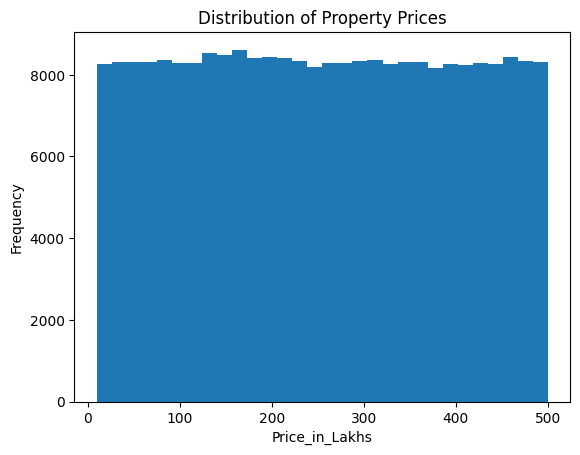

In [24]:
# Distribution of Property Prices
plt.figure()
plt.hist(df["Price_in_Lakhs"], bins=30)
plt.title("Distribution of Property Prices")
plt.xlabel("Price_in_Lakhs")
plt.ylabel("Frequency")
plt.show()

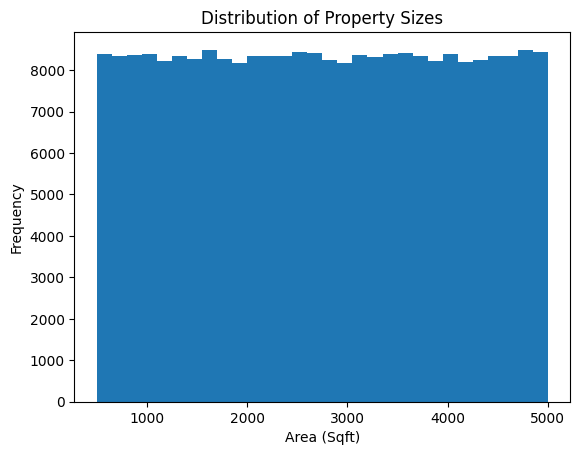

In [25]:
# Distribution of property sizes
plt.figure()
plt.hist(df["Size_in_SqFt"], bins=30)
plt.title("Distribution of Property Sizes")
plt.xlabel("Area (Sqft)")
plt.ylabel("Frequency")
plt.show()

<Figure size 640x480 with 0 Axes>

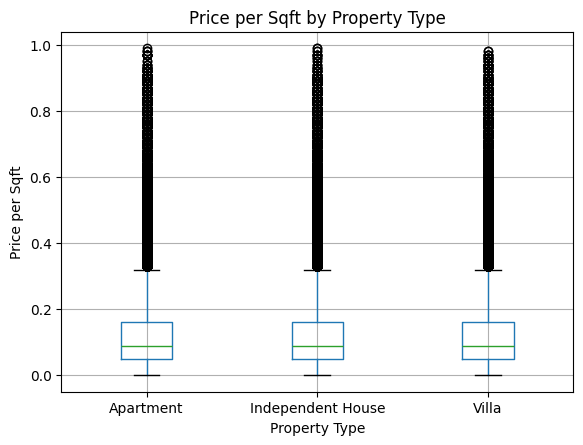

In [14]:
# price per sq ft vary by property type
if "Property_Type" in df.columns:
    plt.figure()
    df.boxplot(column="Price_per_SqFt", by="Property_Type")
    plt.title("Price per Sqft by Property Type")
    plt.suptitle("")
    plt.xlabel("Property Type")
    plt.ylabel("Price per Sqft")
    plt.show()
else:
    print("⚠ Property_Type column not found (it was one-hot encoded). This plot cannot be generated directly.")

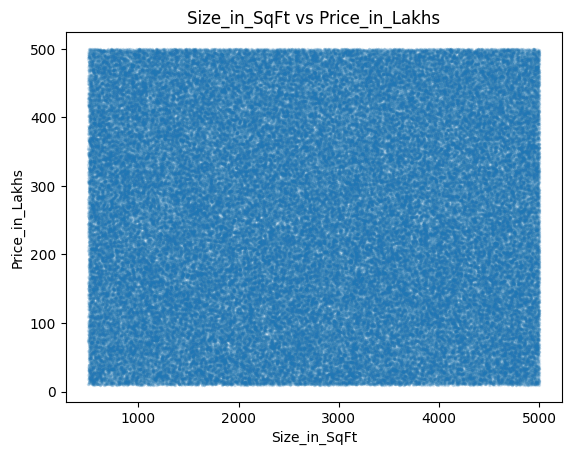

In [21]:
# Is there a relationship between property size and price?

plt.figure()
plt.scatter(
    df["Size_in_SqFt"],
    df["Price_in_Lakhs"],
    s=2,        # smaller dots
    alpha=0.1   # transparency to reduce overlap
)

plt.title("Size_in_SqFt vs Price_in_Lakhs")
plt.xlabel("Size_in_SqFt")
plt.ylabel("Price_in_Lakhs")
plt.show()

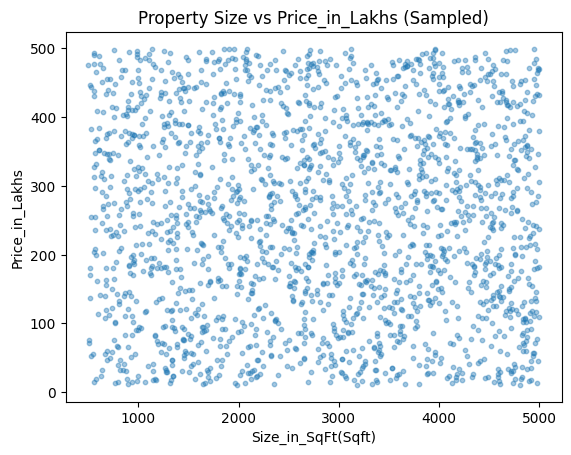

In [30]:
# Is there a relationship between property size and price? (sampled)
df_sample = df.sample(2000, random_state=42)

plt.figure()
plt.scatter(
    df_sample["Size_in_SqFt"],
    df_sample["Price_in_Lakhs"],
    s=10,
    alpha=0.4
)
plt.title("Property Size vs Price_in_Lakhs (Sampled)")
plt.xlabel("Size_in_SqFt(Sqft)")
plt.ylabel("Price_in_Lakhs")
plt.show()

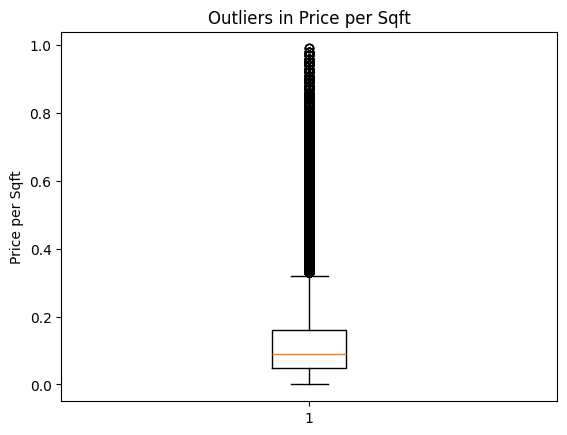

In [26]:
# Are there any outliers in price per sq ft or property size
# Outliers in Price per Sqft

plt.figure()
plt.boxplot(df["Price_per_SqFt"])
plt.title("Outliers in Price per Sqft")
plt.ylabel("Price per Sqft")
plt.show()

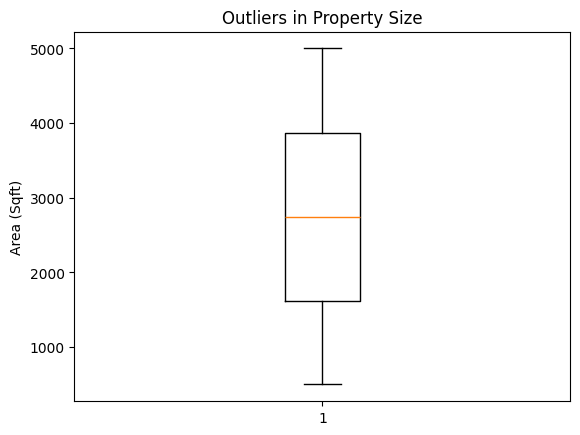

In [28]:
# Outliers in Property Size

plt.figure()
plt.boxplot(df["Size_in_SqFt"])
plt.title("Outliers in Property Size")
plt.ylabel("Area (Sqft)")
plt.show()

#### Location-based Analysis

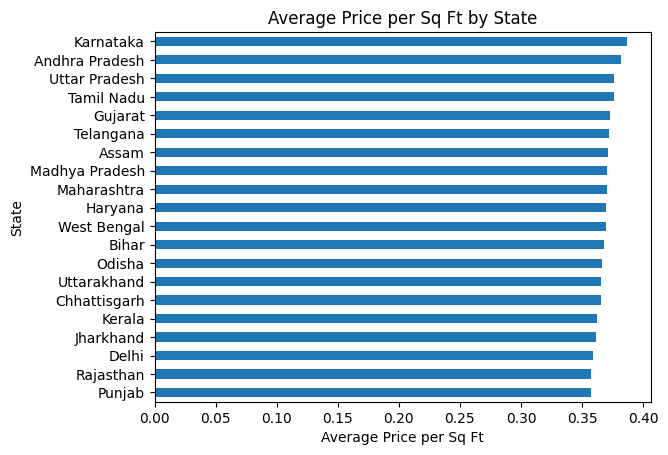

In [31]:
# What is the average price per sq ft by state?

if "State" in df.columns and "Price_per_SqFt" in df.columns:
    avg_pps_state = df_labeled.groupby("State")["Price_per_SqFt"].mean().sort_values()

    plt.figure()
    avg_pps_state.plot(kind="barh")
    plt.title("Average Price per Sq Ft by State")
    plt.xlabel("Average Price per Sq Ft")
    plt.ylabel("State")
    plt.show()
else:
    print("⚠ Required columns: 'State' or 'Price_per_Sqft' not found.")

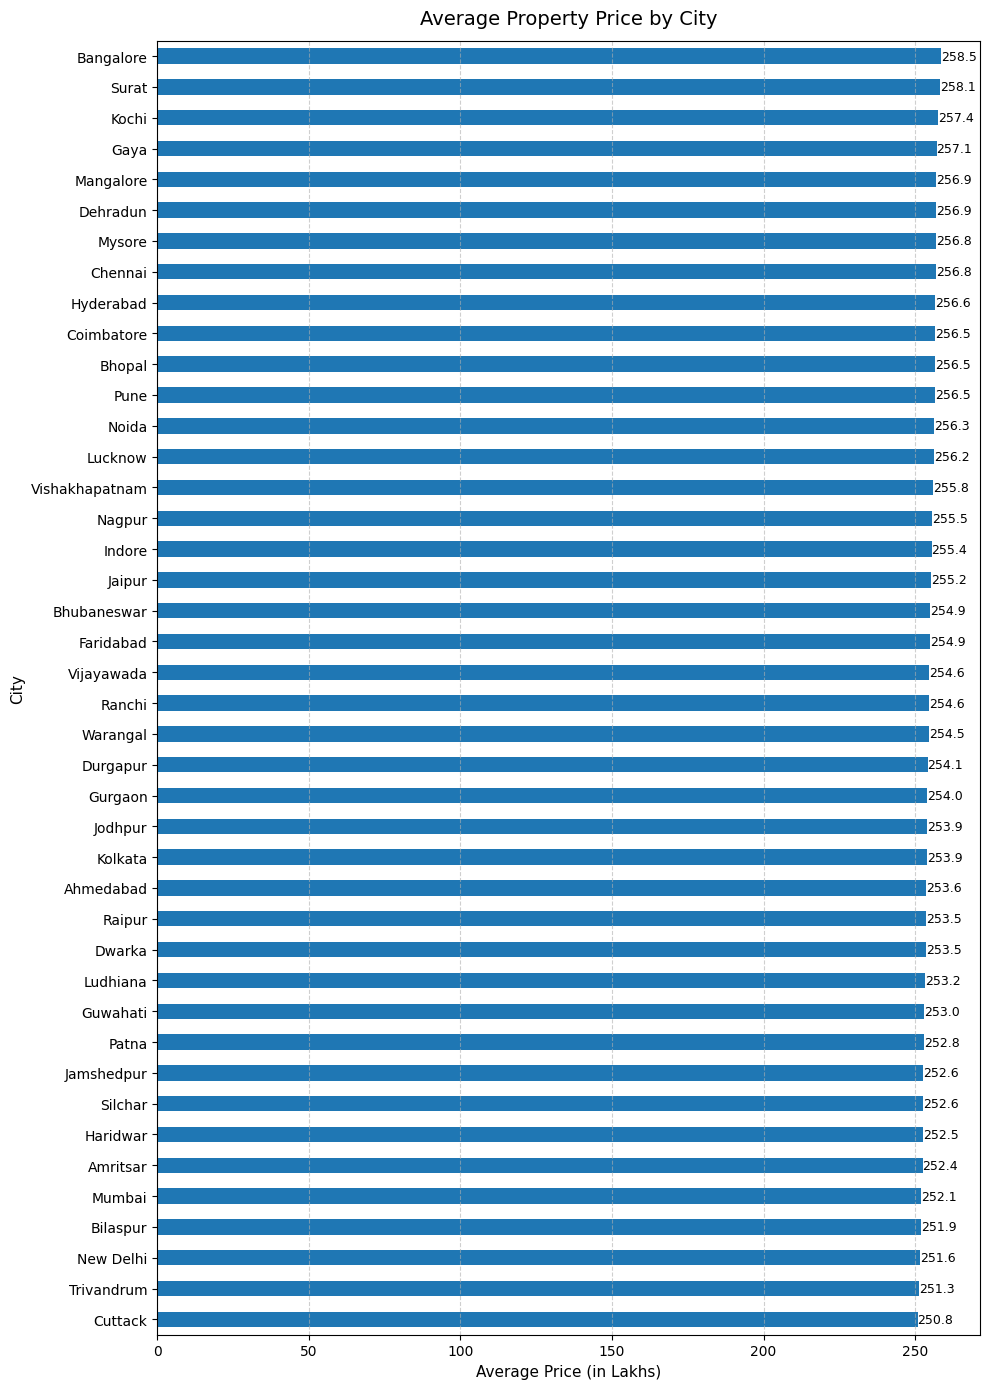

In [36]:
# What is the average property price by city?

if "City" in df.columns and "Price_in_Lakhs" in df.columns:
    
    avg_price_city = (
        df.groupby("City")["Price_in_Lakhs"]
        .mean()
        .sort_values()   # keeps it clean from low → high
    )

    plt.figure(figsize=(10, 14))  # bigger figure for readability
    
    avg_price_city.plot(kind="barh")

    plt.title("Average Property Price by City", fontsize=14, pad=12)
    plt.xlabel("Average Price (in Lakhs)", fontsize=11)
    plt.ylabel("City", fontsize=11)

    # Add grid for better readability
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Add value labels on bars
    for index, value in enumerate(avg_price_city.values):
        plt.text(value, index, f"{value:.1f}", va="center", fontsize=9)

    plt.tight_layout()  # prevents label cutoff
    plt.show()

else:
    print("⚠ Required columns: 'City' or 'Price_in_Lakhs' not found.")

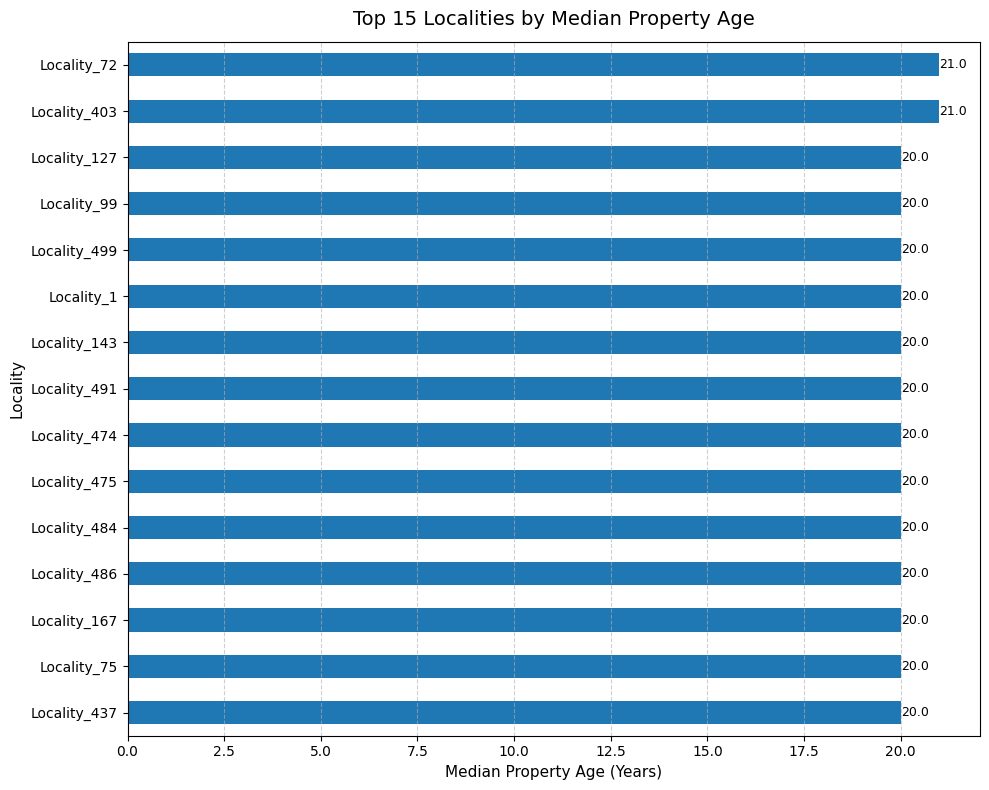

In [42]:
# What is the median age of properties by locality?

# What is the median age of properties by locality?

if "Locality" in df.columns and "Age_of_Property" in df.columns:

    median_age_locality = (
        df.groupby("Locality")["Age_of_Property"]
        .median()
        .sort_values()
    )

    # ✅ Show only top 15 localities (oldest properties)
    median_age_locality = median_age_locality.tail(15)

    plt.figure(figsize=(10, 8))

    median_age_locality.plot(kind="barh")

    plt.title("Top 15 Localities by Median Property Age", fontsize=14, pad=12)
    plt.xlabel("Median Property Age (Years)", fontsize=11)
    plt.ylabel("Locality", fontsize=11)

    # ✅ Add grid
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # ✅ Add value labels on bars
    for index, value in enumerate(median_age_locality.values):
        plt.text(value, index, f"{value:.1f}", va="center", fontsize=9)

    plt.tight_layout()
    plt.show()

else:
    print("⚠ Required columns: 'Locality' or 'Age_of_Property' not found.")


<Figure size 1200x700 with 0 Axes>

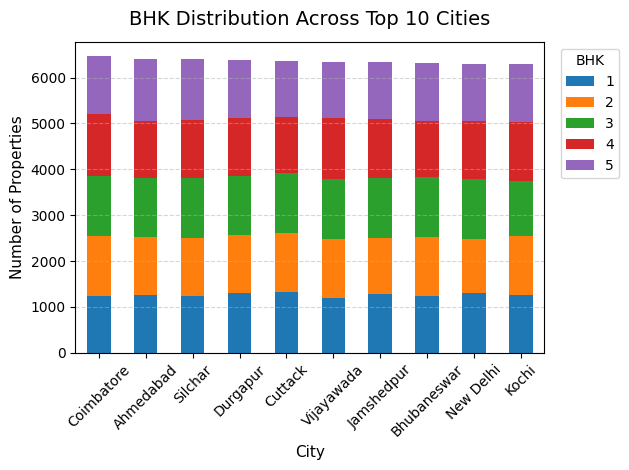

In [44]:
# How is BHK distributed across cities?

if "City" in df.columns and "BHK" in df.columns:

    # Create BHK vs City table
    bhk_city = pd.crosstab(df["City"], df["BHK"])

    # ✅ Select only TOP 10 cities with most properties
    top_cities = df["City"].value_counts().head(10).index
    bhk_city_top = bhk_city.loc[top_cities]

    plt.figure(figsize=(12, 7))

    # ✅ Stacked bar chart (much cleaner than side-by-side)
    bhk_city_top.plot(kind="bar", stacked=True)

    plt.title("BHK Distribution Across Top 10 Cities", fontsize=14, pad=12)
    plt.xlabel("City", fontsize=11)
    plt.ylabel("Number of Properties", fontsize=11)

    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # ✅ Move legend outside to avoid overlap
    plt.legend(title="BHK", bbox_to_anchor=(1.02, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

else:
    print("⚠ Required columns: 'City' or 'BHK' not found.")


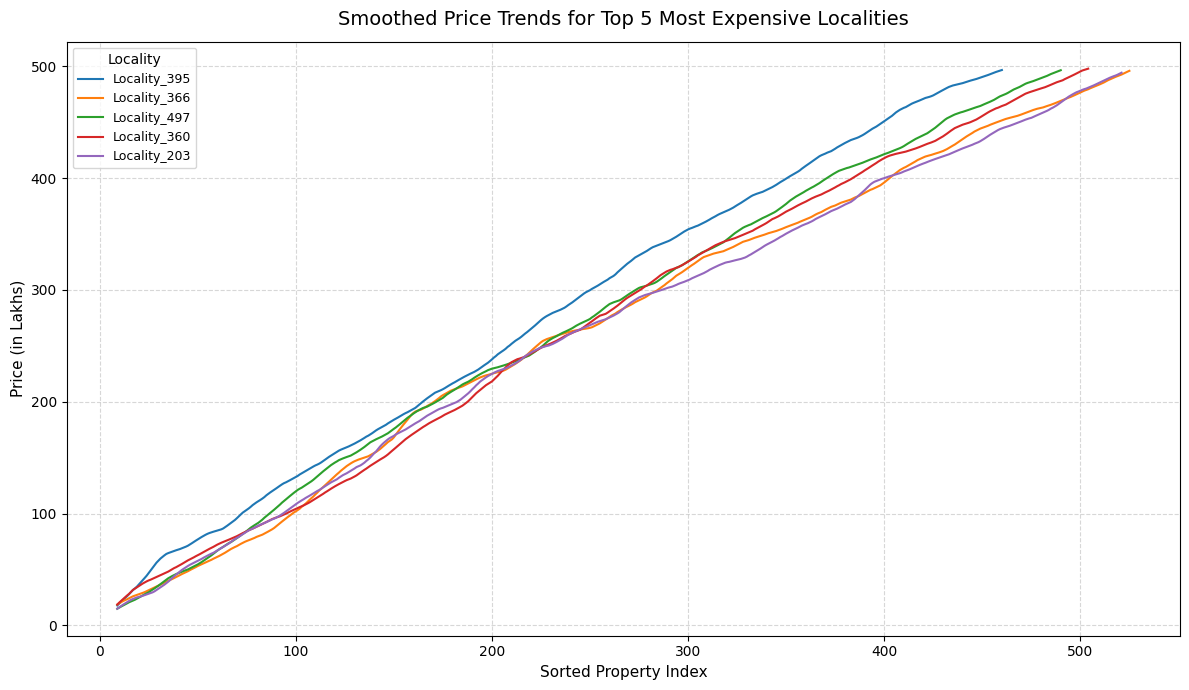

In [46]:
# What are the price trends for the top 5 most expensive localities?

if "Locality" in df.columns and "Price_in_Lakhs" in df.columns:

    # Get top 5 most expensive localities by average price
    top_localities = (
        df.groupby("Locality")["Price_in_Lakhs"]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    top_locality_data = df[df["Locality"].isin(top_localities)]

    plt.figure(figsize=(12, 7))

    for loc in top_localities:
        loc_data = top_locality_data[top_locality_data["Locality"] == loc]

        # ✅ Sort values for meaningful trend
        loc_data = loc_data.sort_values("Price_in_Lakhs")

        # ✅ Smooth the trend using rolling mean
        smooth_price = loc_data["Price_in_Lakhs"].rolling(window=10).mean()

        plt.plot(smooth_price.values, label=loc)

    plt.title("Smoothed Price Trends for Top 5 Most Expensive Localities", fontsize=14, pad=12)
    plt.xlabel("Sorted Property Index", fontsize=11)
    plt.ylabel("Price (in Lakhs)", fontsize=11)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Locality", fontsize=9)

    plt.tight_layout()
    plt.show()

else:
    print("⚠ Required columns: 'Locality' or 'Price_in_Lakhs' not found.")


#### Feature Relationship & Correlation

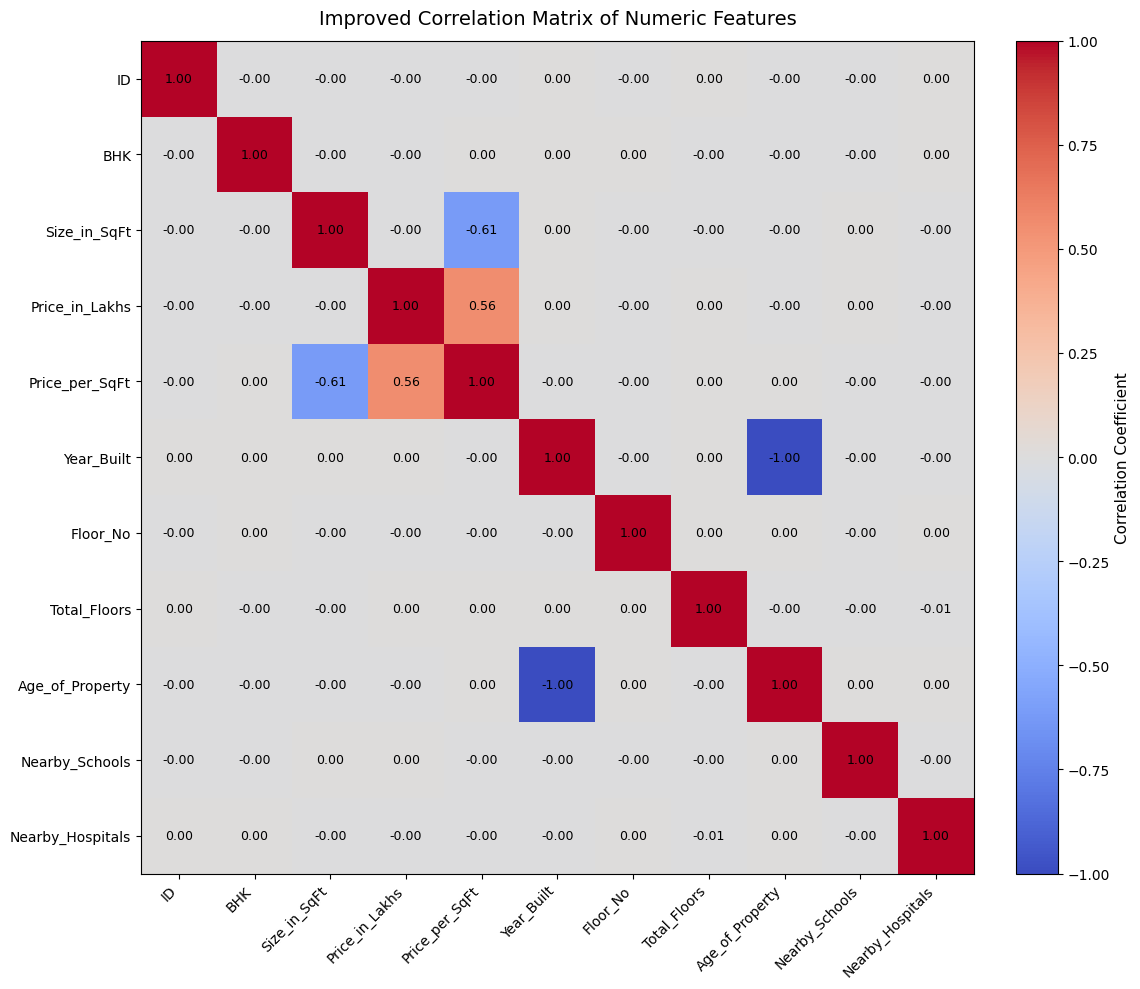

In [6]:
# How are numeric features correlated with each other?

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create figure
plt.figure(figsize=(12, 10))

# Show heatmap
im = plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Correlation Coefficient", fontsize=11)

# Set ticks and labels
plt.xticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    rotation=45,
    ha="right",
    fontsize=10
)
plt.yticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    fontsize=10
)

# Annotate each cell with correlation value
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=9)

# Title
plt.title("Improved Correlation Matrix of Numeric Features", fontsize=14, pad=12)

# Grid alignment & spacing
plt.tight_layout()
plt.show()


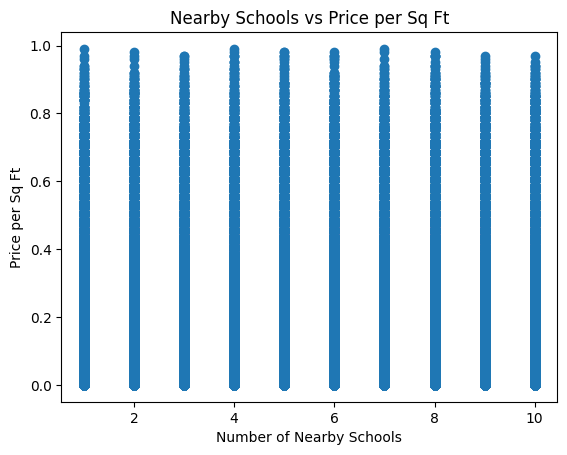

In [7]:
# How do nearby schools relate to price per sq ft?

if "Nearby_Schools" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure()
    plt.scatter(df["Nearby_Schools"], df["Price_per_SqFt"])
    plt.title("Nearby Schools vs Price per Sq Ft")
    plt.xlabel("Number of Nearby Schools")
    plt.ylabel("Price per Sq Ft")
    plt.show()
else:
    print("⚠ Required columns: 'Nearby_Schools' or 'Price_per_Sqft' not found.")

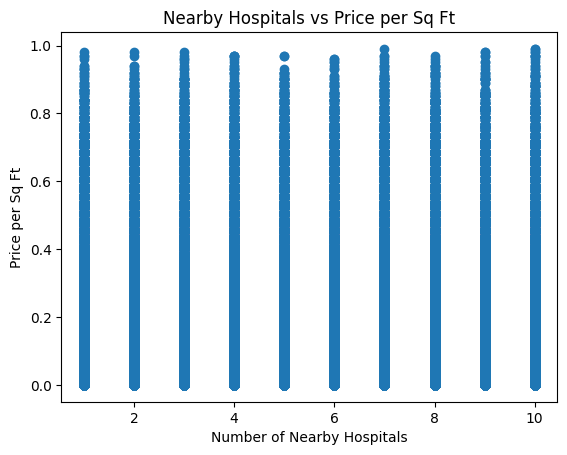

In [9]:
# How do nearby hospitals relate to price per sq ft?

if "Nearby_Hospitals" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure()
    plt.scatter(df["Nearby_Hospitals"], df["Price_per_SqFt"])
    plt.title("Nearby Hospitals vs Price per Sq Ft")
    plt.xlabel("Number of Nearby Hospitals")
    plt.ylabel("Price per Sq Ft")
    plt.show()
else:
    print("⚠ Required columns: 'Nearby_Hospitals' or 'Price_per_Sqft' not found.")

<Figure size 640x480 with 0 Axes>

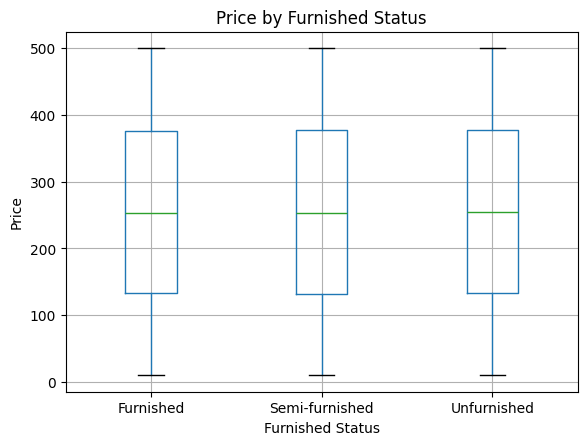

In [10]:
# How does price vary by furnished status?

if "Furnished_Status" in df.columns and "Price_in_Lakhs" in df.columns:
    plt.figure()
    df.boxplot(column="Price_in_Lakhs", by="Furnished_Status")
    plt.title("Price by Furnished Status")
    plt.suptitle("")
    plt.xlabel("Furnished Status")
    plt.ylabel("Price")
    plt.show()
else:
    print("⚠ Required columns: 'Furnished_Status' or 'Price' not found.")

<Figure size 640x480 with 0 Axes>

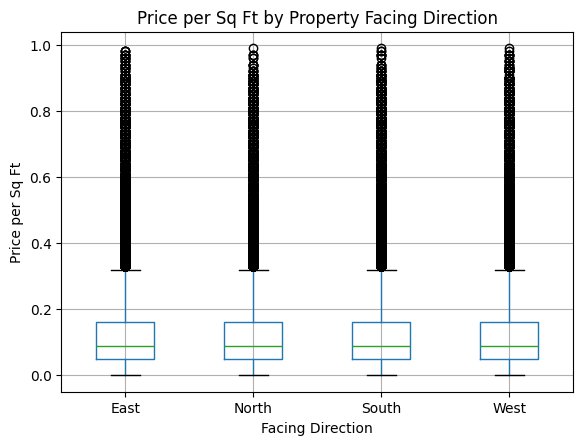

In [13]:
# How does price per sq ft vary by property facing direction?

if "Facing" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure()
    df.boxplot(column="Price_per_SqFt", by="Facing")
    plt.title("Price per Sq Ft by Property Facing Direction")
    plt.suptitle("")
    plt.xlabel("Facing Direction")
    plt.ylabel("Price per Sq Ft")
    plt.show()
else:
    print("⚠ Required columns: 'Facing' or 'Price_per_Sqft' not found.")

#### Investment / Amenities / Ownership Analysis

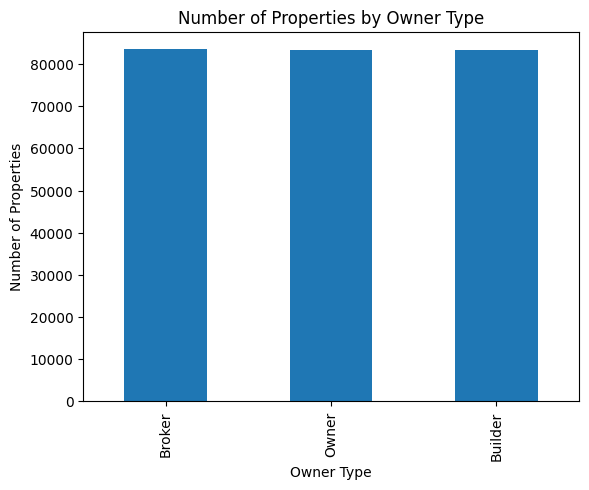

In [15]:
# How many properties belong to each owner type?

if "Owner_Type" in df.columns:
    owner_counts = df["Owner_Type"].value_counts()

    plt.figure()
    owner_counts.plot(kind="bar")
    plt.title("Number of Properties by Owner Type")
    plt.xlabel("Owner Type")
    plt.ylabel("Number of Properties")
    plt.show()
else:
    print("⚠ Column 'Owner_Type' not found.")

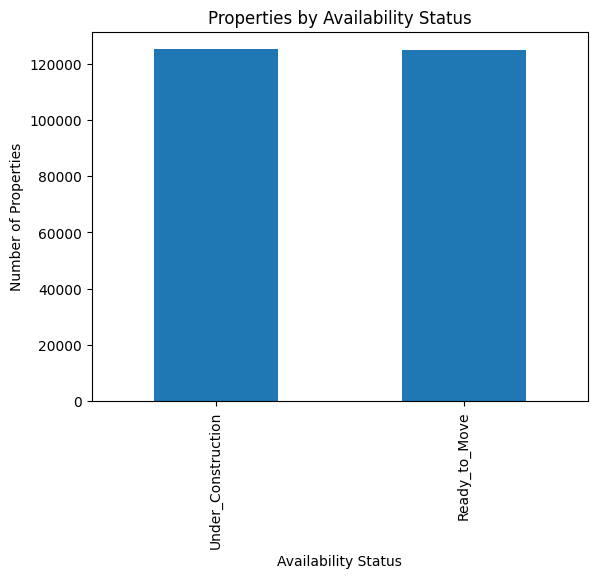

In [16]:
# How many properties are available under each availability status?

if "Availability_Status" in df.columns:
    availability_counts = df["Availability_Status"].value_counts()

    plt.figure()
    availability_counts.plot(kind="bar")
    plt.title("Properties by Availability Status")
    plt.xlabel("Availability Status")
    plt.ylabel("Number of Properties")
    plt.show()
else:
    print("⚠ Column 'Availability_Status' not found.")

<Figure size 640x480 with 0 Axes>

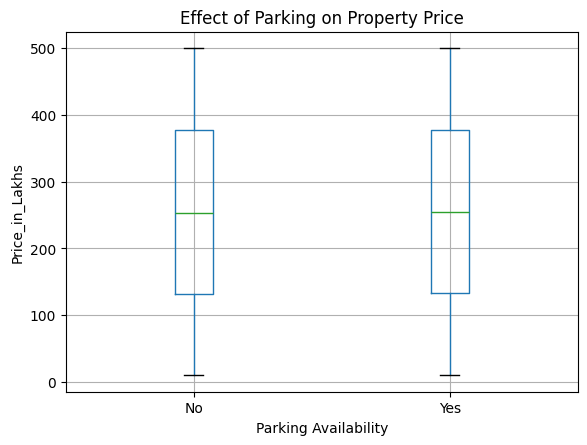

In [5]:
# Does parking space affect property price?

if "Parking_Space" in df.columns and "Price_in_Lakhs" in df.columns:
    plt.figure()
    df.boxplot(column="Price_in_Lakhs", by="Parking_Space")
    plt.title("Effect of Parking on Property Price")
    plt.suptitle("")
    plt.xlabel("Parking Availability")
    plt.ylabel("Price_in_Lakhs")
    plt.show()
else:
    print("⚠ Required columns: 'Parking' or 'Price' not found.")

<Figure size 800x600 with 0 Axes>

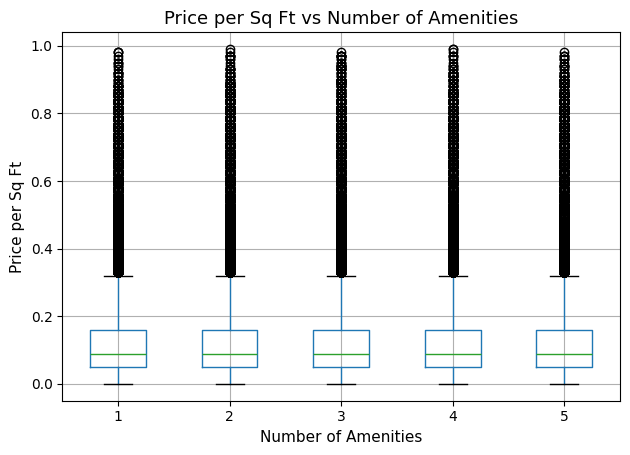

In [9]:
# How do amenities affect price per sq ft?

# Create Amenities count
df["Amenity_Count"] = df["Amenities"].apply(
    lambda x: len(str(x).split(",")) if pd.notna(x) else 0
)

plt.figure(figsize=(8, 6))

df.boxplot(
    column="Price_per_SqFt",
    by="Amenity_Count",
    grid=True
)

plt.title("Price per Sq Ft vs Number of Amenities", fontsize=13)
plt.suptitle("")
plt.xlabel("Number of Amenities", fontsize=11)
plt.ylabel("Price per Sq Ft", fontsize=11)

plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

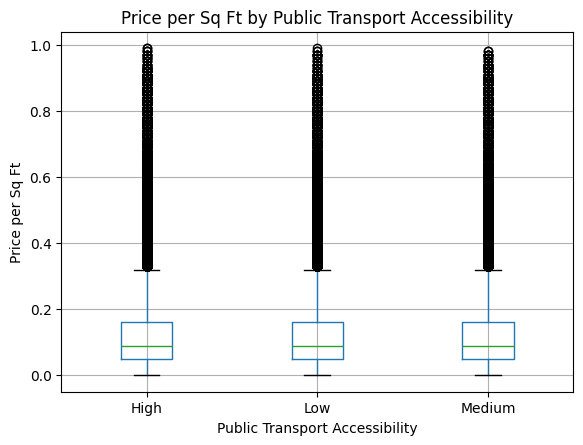

In [10]:
#	How does public transport accessibility relate to price per sq ft or investment potential?

if "Public_Transport_Accessibility" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure()
    df.boxplot(
        column="Price_per_SqFt",
        by="Public_Transport_Accessibility"
    )
    plt.title("Price per Sq Ft by Public Transport Accessibility")
    plt.suptitle("")
    plt.xlabel("Public Transport Accessibility")
    plt.ylabel("Price per Sq Ft")
    plt.show()
else:
    print("⚠ Required columns: 'Public_Transport_Accessibility' or 'Price_per_Sqft' not found.")

## ***3. Model Development***

In [8]:
df_labeled.columns

Index(['ID', 'Locality', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs',
       'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No',
       'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Owner_Type', 'Availability_Status',
       'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi',
       'State_Gujarat', 'State_Haryana', 'State_Jharkhand', 'State_Karnataka',
       'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu',
       'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand',
       'State_West Bengal', 'City_Amritsar', 'City_Bangalore', 'City_Bhopal',
       'City_Bhubaneswar', 'City_Bilaspur', 'City_Chennai', 'City_Coimbatore',
       'City_Cuttack', 'City_Dehradun', 'City_Durgapur', 'City_Dwarka',
       'City_Faridabad', 'City_Gaya', 'City_Gurg

#### ML Ready dataset

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------------------------------------
# 1. Copy dataset
# ---------------------------------------
df_ml = df_labeled.copy()

# ---------------------------------------
# 2. Drop non-ML identifier columns
# (only if present)
# ---------------------------------------
drop_cols = ["ID","School_Density_Score", "Locality", "Property_Type", "BHK", "Year_Built", "Furnished_Status", "Floor_No", "Total_Floors", "Age_of_Property","Nearby_Schools","Near by_Hospitals", 
            "Public_Transport_Accessibility", "Parking_Space", "Security", "Amenities", "Facing", "Owner_Type", "Availability_Status"]

df_ml = df_ml.drop(columns=[c for c in drop_cols if c in df_ml.columns])

# ---------------------------------------
# 3. Handle missing values
# ---------------------------------------
# Numeric → fill with median
num_cols = df_ml.select_dtypes(include=["int64", "float64"]).columns
df_ml[num_cols] = df_ml[num_cols].fillna(df_ml[num_cols].median())

# Categorical → fill with mode
cat_cols = df_ml.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_ml[col] = df_ml[col].fillna(df_ml[col].mode()[0])

# ---------------------------------------
# 4. Separate Target Variable
# ---------------------------------------
y = df_ml["Good_Investment"]
X = df_ml.drop(columns=["Good_Investment"])

# ---------------------------------------
# 5. One-Hot Encode Remaining Categorical Columns
# ---------------------------------------
#X = pd.get_dummies(X, drop_first=True)

# ---------------------------------------
# 6. Feature Scaling (StandardScaler)
# ---------------------------------------
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# ---------------------------------------
# 7. Train-Test Split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# ---------------------------------------
# 8. Save ML-Ready Files
# ---------------------------------------
#X_train.to_csv("X_train_ml_ready.csv", index=False)
#X_test.to_csv("X_test_ml_ready.csv", index=False)
#y_train.to_csv("y_train_ml_ready.csv", index=False)
#y_test.to_csv("y_test_ml_ready.csv", index=False)

# ---------------------------------------
# 9. Confirmation Output
# ---------------------------------------
print("✅ ML-Ready Dataset Created Successfully")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ ML-Ready Dataset Created Successfully
X_train shape: (200000, 68)
X_test shape: (50000, 68)
y_train shape: (200000,)
y_test shape: (50000,)


#### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


✅ Logistic Regression Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30064
           1       1.00      1.00      1.00     19936

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Confusion Matrix:
 [[30064     0]
 [    0 19936]]


#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("✅ Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


✅ Random Forest Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30064
           1       1.00      1.00      1.00     19936

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Confusion Matrix:
 [[30064     0]
 [    0 19936]]


#### Xgboost classifier

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("✅ XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


✅ XGBoost Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30064
           1       1.00      1.00      1.00     19936

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Confusion Matrix:
 [[30064     0]
 [    0 19936]]


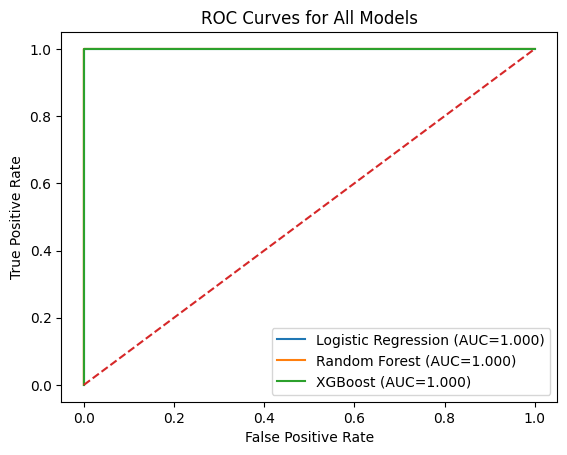

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Safety checks for test data
if "X_test" not in globals() or "y_test" not in globals():
    raise RuntimeError("X_test and y_test must be available. Run the ML-ready dataset and model training steps first.")

plt.figure()

# -------------------------------
# Logistic Regression ROC
# -------------------------------
if "lr_model" in globals():
    lr_probs = lr_model.predict_proba(X_test)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
    auc_lr = roc_auc_score(y_test, lr_probs)
    plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")

# -------------------------------
# Random Forest ROC
# -------------------------------
if "rf_model" in globals():
    rf_probs = rf_model.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
    auc_rf = roc_auc_score(y_test, rf_probs)
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")

# -------------------------------
# XGBoost ROC
# -------------------------------
if "xgb_model" in globals():
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
    auc_xgb = roc_auc_score(y_test, xgb_probs)
    plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

# -------------------------------
# Baseline Diagonal
# -------------------------------
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


#### Saving classification model

In [34]:
import joblib
import json

# -------------------------------
# 1. Save Classification Model
# -------------------------------
joblib.dump(rf_model, "classification_model.pkl")

# -------------------------------
# 2. Save Classifier Scaler
# -------------------------------
joblib.dump(scaler, "classification_scaler.pkl")

# -------------------------------
# 3. Save Feature Names
# -------------------------------
with open("classification_features.json", "w") as f:
    json.dump(list(X_train.columns), f)

print("✅ Classification model, scaler & features saved for Streamlit")


✅ Classification model, scaler & features saved for Streamlit


#### Regression model

In [17]:
# Creating target variable future price after 5 years

# Using fixed growth rate


r = 0.08   # 8% annual growth
t = 5      # 5 years

df_reg_fixed = df_labeled.copy()
df_reg_fixed["Future_Price_5Y"] = df_reg_fixed["Price_in_Lakhs"] * ((1 + r) ** t)

print(df_reg_fixed[["Price_in_Lakhs", "Future_Price_5Y"]].head())


   Price_in_Lakhs  Future_Price_5Y
0        0.965457       719.618119
1       -0.238816       287.283026
2       -0.286825       270.047807
3        0.189989       441.224528
4       -0.290468       268.740105


In [ ]:
# Use different growth rates per city

df_reg_city = df_labeled.copy()
t = 5

df_reg_city["City_Growth_Rate"] = df_reg_city["City"].map(growth_rate_city)
df_reg_city["City_Growth_Rate"].fillna(0.08, inplace=True)  # default 8%

df_reg_city["Future_Price_5Y"] = (
    df_reg_city["Price_in_Lakhs"] * ((1 + df_reg_city["City_Growth_Rate"]) ** t)
)

df_reg_city[["City", "Price_in_Lakhs", "Future_Price_5Y"]].head()


In [ ]:
# Use different growth rates per property

growth_rate_property = {
    "Apartment": 0.08,
    "Villa": 0.10,
    "Independent House": 0.07
}

# Property based growth rate

df_reg_type = df_labeled.copy()

df_reg_type["Type_Growth_Rate"] = df_reg_type["Property_Type"].map(growth_rate_property)
df_reg_type["Type_Growth_Rate"].fillna(0.08, inplace=True)

df_reg_type["Future_Price_5Y"] = (
    df_reg_type["Price_in_Lakhs"] * ((1 + df_reg_type["Type_Growth_Rate"]) ** 5)
)

df_reg_type[["Property_Type", "Price_in_Lakhs", "Future_Price_5Y"]].head()

In [9]:
# Feature-Based Growth Rate

df_reg_feature = df_labeled.copy()

# Example feature-weighted growth model
df_reg_feature["Estimated_Growth_Rate"] = (
    0.04 +                       # base growth
    0.002 * df_reg_feature["BHK"] +
    0.00001 * df_reg_feature["Size_in_SqFt"] +
    0.01 * df_reg_feature["Good_Investment"] +
    0.003 * df_reg_feature["Nearby_Schools"]
)

df_reg_feature["Future_Price_5Y"] = (
    df_reg_feature["Price_in_Lakhs"] * ((1 + df_reg_feature["Estimated_Growth_Rate"]) ** 5)
)

df_reg_feature[["Price_in_Lakhs", "Estimated_Growth_Rate", "Future_Price_5Y"]].head()


,Price_in_Lakhs,Estimated_Growth_Rate,Future_Price_5Y
0,0.965457,0.041009,1.180334
1,-0.238816,0.051798,-0.307416
2,-0.286825,0.051404,-0.368524
3,0.189989,0.039000,0.230041
4,-0.290468,0.050409,-0.371442


#### Prepare Ml data for regresssion

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------------------------------------
# Drop target + leakage columns
# ---------------------------------------
y = df_reg_feature["Future_Price_5Y"]

drop_cols = ["Future_Price_5Y", "Estimated_Growth_Rate","ID","School_Density_Score", "Locality", "Property_Type", "BHK", "Year_Built", "Furnished_Status", "Floor_No", "Total_Floors", "Age_of_Property","Nearby_Schools","Near by_Hospitals", 
            "Public_Transport_Accessibility", "Parking_Space", "Security", "Amenities", "Facing", "Owner_Type", "Availability_Status"]
X = df_reg_feature.drop(columns=[c for c in drop_cols if c in df_reg_feature.columns])

# Train-Test Split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✅ Regression Train/Test Data Ready")


✅ Regression Train/Test Data Ready


#### Train Regression models

#### Linear Regression

✅ Linear Regression Results
RMSE: 0.01105762579086524
MAE : 0.008846196244142611
R²  : 0.9997642099693569


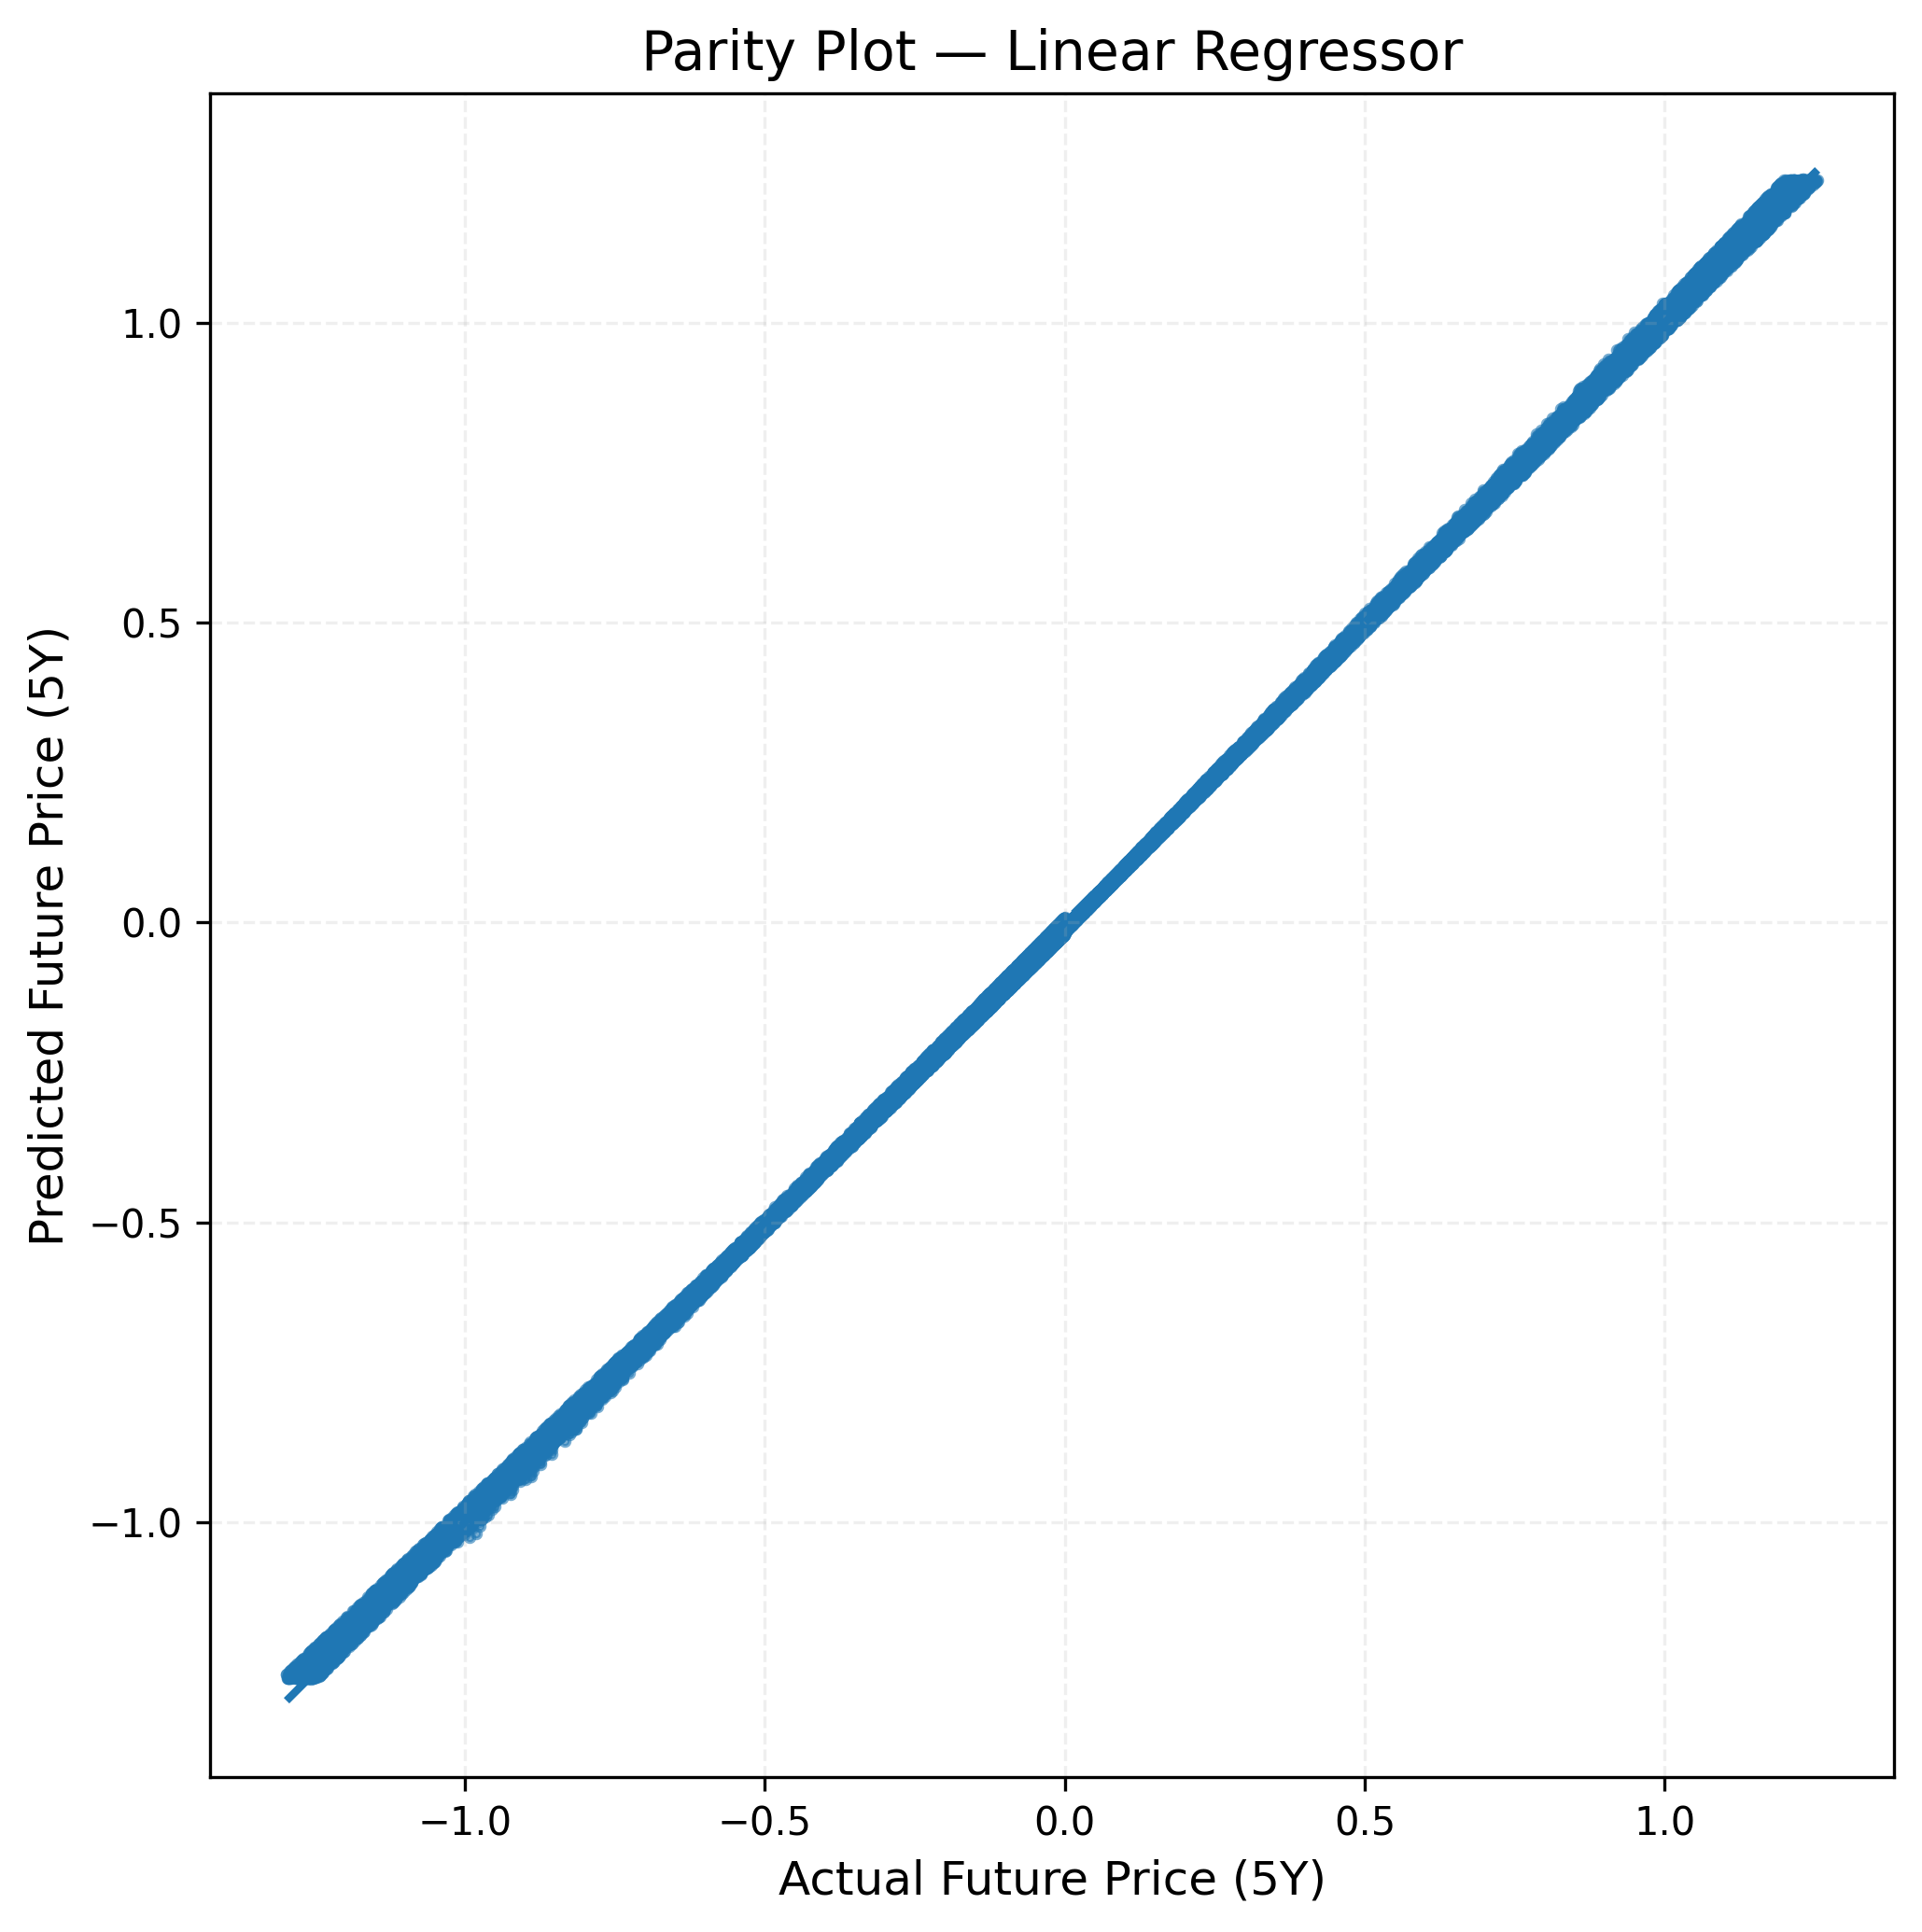

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

y_pred_lr = lr_reg.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("✅ Linear Regression Results")
print("RMSE:", rmse_lr)
print("MAE :", mae_lr)
print("R²  :", r2_lr)

# Create figure with high resolution
plt.figure(figsize=(7, 7), dpi=300)

# Scatter plot
plt.scatter(
    y_test,
    y_pred_lr,
    alpha=0.6,
    s=5
)

# 45-degree reference line (perfect prediction)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    linewidth=2
)

# Labels & title
plt.xlabel("Actual Future Price (5Y)", fontsize=12)
plt.ylabel("Predicted Future Price (5Y)", fontsize=12)
plt.title("Parity Plot — Linear Regressor", fontsize=14)

# Equal aspect ratio for true parity
plt.gca().set_aspect("equal", adjustable="box")

# Grid for publication readability
plt.grid(True, linestyle="--", alpha=0.2)

# Tight layout for clean export
plt.tight_layout()

# OPTIONAL: Save for paper/thesis
# plt.savefig("xgb_parity_plot.png", dpi=300, bbox_inches="tight")

plt.show()

#### Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("✅ Random Forest Regressor Results")
print("RMSE:", rmse_rf)
print("MAE :", mae_rf)
print("R²  :", r2_rf)


✅ Random Forest Regressor Results
RMSE: 0.007797967906331911
MAE : 0.005534282204611419
R²  : 0.9998827360420415


#### Xgboost Regressor

In [24]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("✅ XGBoost Regressor Results")
print("RMSE:", rmse_xgb)
print("MAE :", mae_xgb)
print("R²  :", r2_xgb)


✅ XGBoost Regressor Results
RMSE: 0.009361268661032733
MAE : 0.007252933657740436
R²  : 0.9998310060798482


#### Final Regression model comparison

In [25]:
results_reg = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb],
    "MAE":  [mae_lr, mae_rf, mae_xgb],
    "R2":   [r2_lr, r2_rf, r2_xgb]
})

print(results_reg)


               Model      RMSE       MAE        R2
0  Linear Regression  0.011058  0.008846  0.999764
1      Random Forest  0.007798  0.005534  0.999883
2            XGBoost  0.009361  0.007253  0.999831


#### Save Regression model

In [29]:
import joblib
import json

# -------------------------------
# 1. Save Regression Model
# -------------------------------
joblib.dump(xgb_reg, "regression_model.pkl")   # or rf_reg

# -------------------------------
# 2. Save Regression Scaler
# -------------------------------
joblib.dump(scaler, "regression_scaler.pkl")

# -------------------------------
# 3. Save Regression Feature Names
# -------------------------------
with open("regression_features.json", "w") as f:
    json.dump(list(X_train.columns), f)

print("✅ Regression model, scaler & features saved for Streamlit")


✅ Regression model, scaler & features saved for Streamlit


## ***4. ML flow integration***

In [ ]:
# mlflow_train_and_register.py
import os
import tempfile
import json
import mlflow
import mlflow.sklearn
from mlflow import MlflowClient
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Optional XGBoost
try:
    from xgboost import XGBRegressor
    XGBOOST_AVAILABLE = True
except Exception:
    XGBOOST_AVAILABLE = False

if "df_reg_feature " not in globals():
    raise RuntimeError("df_reg not found — create it first (see earlier pipeline).")

y = df_reg_feature ["Future_Price_5Y"]
X = df_reg_feature .drop(columns=["Future_Price_5Y", "Estimated_Growth_Rate"], errors="ignore")


# -------------------------
# 1. MLflow experiment setup
# -------------------------
EXPERIMENT_NAME = "RealEstate_FuturePrice_5Y_feature_based"
mlflow.set_experiment(EXPERIMENT_NAME)

client = MlflowClient()  # for registry operations later

# optional: print experiment info
exp = client.get_experiment_by_name(EXPERIMENT_NAME)
print(f"Using MLflow experiment: id={exp.experiment_id}, name={exp.name}")

# -------------------------
# Helper: train, evaluate, log one model
# -------------------------
def evaluate_and_log(model, model_name, params=None, run_tags=None):
    """
    Train model, evaluate metrics and log everything to MLflow.
    Returns the run ID and metrics dict.
    """
    params = params or {}
    run_tags = run_tags or {}

    with mlflow.start_run(run_name=model_name) as run:
        run_id = run.info.run_id
        print(f"Started MLflow run {run_id} for model {model_name}")

        # Log params (hyperparams)
        for k, v in params.items():
            mlflow.log_param(k, v)
        mlflow.set_tags(run_tags)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Save and log a small metrics JSON as artifact
        metrics_summary = {"rmse": float(rmse), "mae": float(mae), "r2": float(r2)}
        tmpdir = tempfile.mkdtemp()
        metrics_path = os.path.join(tmpdir, "metrics.json")
        with open(metrics_path, "w") as f:
            json.dump(metrics_summary, f)
        mlflow.log_artifact(metrics_path, artifact_path="metrics")

        # Plot Actual vs Predicted and log as artifact
        plt.figure()
        plt.scatter(y_test, y_pred)
        plt.xlabel("Actual Future Price (5Y)")
        plt.ylabel("Predicted Future Price (5Y)")
        plt.title(f"Actual vs Predicted — {model_name}")
        plot_path = os.path.join(tmpdir, f"actual_vs_pred_{model_name}.png")
        plt.tight_layout()
        plt.savefig(plot_path)
        plt.close()
        mlflow.log_artifact(plot_path, artifact_path="plots")

        # Log the model (MLflow model flavor)
        # For sklearn-compatible (and xgboost compatible through sklearn wrapper)
        mlflow.sklearn.log_model(sk_model=model, artifact_path="model")

        print(f"Logged run {run_id} with metrics: {metrics_summary}")

        return run_id, metrics_summary

# -------------------------
# 2. Train & log multiple models
# -------------------------
results = []

# Linear Regression
lr = LinearRegression()
lr_params = {"fit_intercept": True}
run_id_lr, metrics_lr = evaluate_and_log(lr, "LinearRegression", params=lr_params, run_tags={"model_type":"linear"})
results.append(("LinearRegression", run_id_lr, metrics_lr))

# Random Forest
rf = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_params = {"n_estimators": 300, "max_depth": 15}
run_id_rf, metrics_rf = evaluate_and_log(rf, "RandomForestRegressor", params=rf_params, run_tags={"model_type":"rf"})
results.append(("RandomForestRegressor", run_id_rf, metrics_rf))

# XGBoost (if available)
if XGBOOST_AVAILABLE:
    xgb = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1,
                       subsample=0.8, colsample_bytree=0.8, random_state=42, verbosity=0)
    xgb_params = {"n_estimators":300, "max_depth":6, "learning_rate":0.1}
    run_id_xgb, metrics_xgb = evaluate_and_log(xgb, "XGBoostRegressor", params=xgb_params, run_tags={"model_type":"xgb"})
    results.append(("XGBoostRegressor", run_id_xgb, metrics_xgb))
else:
    print("XGBoost not installed — skipping XGBoost training & logging.")

# -------------------------
# 3. Compare runs and register best model
# -------------------------
# Choose the best model by lowest RMSE
best = None
best_rmse = float("inf")
for model_name, run_id, metrics in results:
    rmse = metrics["rmse"]
    print(f"Model {model_name} (run_id={run_id}) rmse={rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best = (model_name, run_id)

if best is None:
    raise RuntimeError("No models were trained or logged.")

best_model_name, best_run_id = best
print(f"Best model: {best_model_name}, run_id={best_run_id}, rmse={best_rmse}")

# -------------------------
# 4. Register best model in Model Registry
# -------------------------
# NOTE: register_model requires the tracking server to support the registry.
# For local file-store MLflow UI, registration may still work but the UI's registry features are limited.
MODEL_NAME = "RealEstate_FuturePrice_5Y_best"

# Model URI for registration
model_uri = f"runs:/{best_run_id}/model"

try:
    # Register model
    mv = client.create_registered_model(MODEL_NAME)  # create if not exists (will error if exists)
    print(f"Created registered model {MODEL_NAME}")
except Exception:
    # model may already exist; that's fine
    pass

# Create a model version from the run
model_version = client.create_model_version(name=MODEL_NAME, source=model_uri, run_id=best_run_id)
print(f"Created model version: {model_version.version} for registered model {MODEL_NAME}")

# Optionally transition it to 'Staging' or 'Production'
client.transition_model_version_stage(
    name=MODEL_NAME,
    version=model_version.version,
    stage="Staging",
    archive_existing_versions=False
)
print(f"Transitioned model {MODEL_NAME} version {model_version.version} to Staging")

# To promote to Production later:
# client.transition_model_version_stage(name=MODEL_NAME, version=model_version.version, stage="Production")

# -------------------------
# 5. Save a short summary CSV of results locally and log it
# -------------------------
summary_df = pd.DataFrame([{"model": r[0], "run_id": r[1], **r[2]} for r in results])
summary_csv = os.path.join(tempfile.mkdtemp(), "model_summary.csv")
summary_df.to_csv(summary_csv, index=False)
mlflow.log_artifact(summary_csv, artifact_path="summary")
print("Logged model summary CSV as artifact.")

print("MLflow run & registry steps finished. Open mlflow UI (`mlflow ui`) to inspect runs and models.")
